In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import nltk
import spacy

In [25]:
df_rating=pd.read_csv(r"C:\Users\user\3D Objects\news_correlation_10ac_week0\data_sets\data_rating.csv\rating.csv")
df_domain_location=pd.read_csv(r"C:\Users\user\3D Objects\news_correlation_10ac_week0\data_sets\domain_location\domains_location.csv")
df_traffic=pd.read_csv(r"C:\Users\user\3D Objects\news_correlation_10ac_week0\data_sets\traffic_data\traffic.csv")

In [26]:
df_rating.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [79]:
df_domain_location.rename(columns={"SourceCommonName":"domain"},inplace=True)

In [115]:
df_domain_location.head(20)

,domain,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China
5,02blog.it,IT,Italy
6,02elf.net,GM,Germany
7,032.ua,UP,Ukraine
8,0362.ua,UP,Ukraine
9,0372.ua,UP,Ukraine


In [28]:
df_url=df_rating["url"]

In [29]:
import re

def extract_keywords(word, pattern):
    matches = re.findall(pattern, word)
    if matches:
        return matches[0]
    else:
        return None

# Example URLs
urls = [
    'https://www.forbes.com/sites/forbestechcouncil/2023/11/08/seizing-opportunities-why-companies-should-invest-in-technology-resiliency/',
    'http://example.com/path/to/page',
    'https://subdomain.example.net/another/path',
    'http://www.testsite.org/sample-page'
]

# Apply the extract_keywords function using the provided regex pattern
domains = [extract_keywords(url, r'https?://(?:www\.)?([^/]+)') for url in urls]

print(domains)


['forbes.com', 'example.com', 'subdomain.example.net', 'testsite.org']


In [30]:
df_rating["url"].value_counts()

url
https://www.ibtimes.com/uk-bans-recreational-use-nitrous-oxide-3717885                                                                             2
https://www.businessinsider.com/moving-to-mexico-from-us-merida-safety-cost-healthcare-2023-11                                                     2
https://readwrite.com/unlock-adtech-with-7-best-ai-tools-in-2023-and-beyond/                                                                       2
https://www.forbes.com/sites/forbestechcouncil/2023/11/08/seizing-opportunities-why-companies-should-invest-in-technology-resiliency/              2
https://readwrite.com/ibm-bets-500m-on-business-focused-ai-startups/                                                                               2
                                                                                                                                                  ..
https://www.etfdailynews.com/2023/11/05/enn-energy-otcmktsxngsy-shares-pass-below-fifty-day-moving-ave

In [31]:
df_traffic.columns

Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')

In [32]:
df_traffic.rename(columns={"Domain":"domain"},inplace=True)
df_traffic["domain"]

0                     google.com
1                   facebook.com
2                    youtube.com
3                    twitter.com
4                  instagram.com
                   ...          
999995                kireie.com
999996               mt-lock.com
999997             pinkwater.com
999998            soderhomes.com
999999    toyotamusicfactory.com
Name: domain, Length: 1000000, dtype: object

In [82]:
from urllib.parse import urlparse
import re

# Function to extract domain using the regex pattern
def extract_domain(url):
    pattern = r'https?://(?:www\.)?([^/]+)'
    matches = re.findall(pattern, url)
    if matches:
        return matches[0]
    else:
        return None


df_rating['domain'] = df_rating['url'].apply(extract_domain)

print(df_rating['domain'])

0                 forbes.com
1        channelnewsasia.com
2                   time.com
3                   phys.org
4          digitaltrends.com
                ...         
58351      indianexpress.com
58352             forbes.com
58353                npr.org
58354             forbes.com
58355             forbes.com
Name: domain, Length: 58356, dtype: object


In [85]:
# Assuming df_traffic also has a 'domain' column
df_merge= pd.merge(df_rating,df_traffic, on="domain",how="inner")
df_merge_rating_location= pd.merge(df_rating,df_domain_location,on="domain",how="inner")




In [86]:
df_merge.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,...,TldRank,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",...,45,com,95914,239145,forbes.com,com,62,43,95888,237935
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,...,970,com,13144,23964,channelnewsasia.com,com,1767,976,13069,23849
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",...,92,com,58079,133712,time.com,com,135,91,57983,133000
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,...,77,org,25240,49640,phys.org,org,622,81,25158,49348
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",...,416,com,23010,46203,digitaltrends.com,com,716,421,22903,45946


In [87]:
df_merge.size

1274150

In [88]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50966 entries, 0 to 50965
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       50966 non-null  int64 
 1   source_id        10403 non-null  object
 2   source_name      50966 non-null  object
 3   author           48839 non-null  object
 4   title            50966 non-null  object
 5   description      50962 non-null  object
 6   url              50966 non-null  object
 7   url_to_image     47515 non-null  object
 8   published_at     50966 non-null  object
 9   content          50966 non-null  object
 10  category         50948 non-null  object
 11  article          50966 non-null  object
 12  title_sentiment  50966 non-null  object
 13  domain           50966 non-null  object
 14  GlobalRank       50966 non-null  int64 
 15  TldRank          50966 non-null  int64 
 16  TLD              50966 non-null  object
 17  RefSubNets       50966 non-null

## let's handle the missing values of the df_merge dataframe

In [89]:
df_merge["source_id"].isnull().sum()


40563

In [60]:
# Create a mapping of source_name to source_id based on non-missing values
source_mapping = df_merge.dropna(subset=['source_id']).set_index('source_name')['source_id'].to_dict()

# Print the mapping to verify
print(source_mapping)


{'Time': 'time', 'Al Jazeera English': 'al-jazeera-english', 'BBC News': 'bbc-news', 'RT': 'rt', 'The Times of India': 'the-times-of-india', 'CNN': 'cnn', 'Business Insider': 'business-insider', 'Wired': 'wired', 'The Verge': 'the-verge'}


In [62]:
# Impute missing source_id values using the mapping
df_merge['source_id'] = df_merge.apply(
    lambda row: source_mapping.get(row['source_name'], row['source_id']), axis=1
)

In [63]:
df_merge["source_id"].isnull().sum()

40482

## No Imputation (Use As Is)
Proceed Without Imputation: If the missing values don’t significantly impact my analysis, or if they have meaning (e.g., they indicate the absence of a source ID), i might choose to leave them as NaN and handle them accordingly during analysis

For source_id, the most practical approach could be using imputation based on source_name, as discussed earlier. However, if that’s not sufficient, you might consider more advanced techniques like KNN imputation or predictive modeling, or even deciding to exclude the column if it's not critical.

## 1. Filling Missing Values with a Placeholder
Fill with 'Unknown': You can fill the missing author values with a generic placeholder like 'Unknown' or 'Anonymous'. This is a common approach when the missing data is not crucial but needs to be handled for consistency in the dataset.

In [64]:
df_merge["author"].fillna("Unknown",inplace=True)

In [65]:
df_merge["author"].isnull().sum()

0

## handling the missing values in the url_image column

In [66]:
df_merge["url_to_image"].fillna("no image in the article", inplace=True)

In [67]:
df_merge["url_to_image"].isnull().sum()

0

## handling the missing values of 'df_merge_rating_location'

# outlier handling

In [90]:
df_merge.describe()

,article_id,GlobalRank,TldRank,RefSubNets,RefIPs,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
count,50966.000000,50966.000000,50966.000000,50966.000000,50966.000000,50966.000000,50966.000000,50966.000000,50966.000000
mean,290530.159754,21966.704980,10906.355178,24175.955873,54240.172409,22053.882373,10954.746694,24134.832025,53975.242789
std,214110.511344,29585.024194,14830.727996,27522.778358,68173.376512,29701.762729,14895.459063,27505.837774,67819.950186
min,418.000000,64.000000,1.000000,1338.000000,1687.000000,62.000000,1.000000,1332.000000,1668.000000
25%,112005.750000,492.000000,309.000000,1338.000000,1687.000000,496.000000,315.000000,1332.000000,1668.000000
50%,240150.500000,1115.000000,427.000000,17585.000000,32104.000000,1123.000000,433.000000,17499.000000,32049.000000
75%,440019.250000,64211.000000,32086.000000,29003.000000,60908.000000,64465.000000,32227.000000,29035.000000,60636.000000
max,781308.000000,64211.000000,32086.000000,95914.000000,239145.000000,64465.000000,32227.000000,95888.000000,237935.000000


### Assessing Potential Outliers

- **Large Standard Deviation**:
  - Columns like `GlobalRank`, `TldRank`, `RefSubNets`, and `RefIPs` have a large standard deviation compared to their mean, suggesting that there may be significant variability in the data, which could be due to outliers.

- **Min and Max Values**:
  - The minimum and maximum values in many columns (e.g., `GlobalRank`, `PrevGlobalRank`) are quite far apart. For instance, `GlobalRank` ranges from 64 to 64,211, and `RefSubNets` from 1,338 to 95,914, which suggests the presence of extreme values.

- **Percentiles**:
  - The difference between the 75th percentile (`Q3`) and the maximum value is significant in many columns. This indicates that the top 25% of the data might include outliers, especially if the maximum value is much higher than `Q3`.


### Handling Outliers: Context and Analysis Goals

In the context of our analysis, where the focus is on understanding and identifying extreme behavior, such as the most influential domains, it is crucial to carefully consider the treatment of outliers.

- **Context**: 
  - Many of the metrics we are analyzing, such as `GlobalRank`, `TldRank`, `RefSubNets`, and `RefIPs`, are part of a ranking system or represent measures of influence and reach. In these contexts, outliers often represent valuable data points rather than errors. For example, a domain with an exceptionally low `GlobalRank` is likely to be one of the most influential websites globally. Similarly, very high values in `RefSubNets` or `RefIPs` may indicate a domain with a vast and diverse backlink network, which is important for understanding its influence.

- **Analysis Goals**:
  - The primary goal of our analysis is to understand extreme behaviors and identify key players within the dataset, such as the most influential domains. In this case, outliers are not anomalies that need to be corrected or removed, but rather crucial data points that provide insight into the upper or lower bounds of influence within the dataset. Therefore, these outliers should be retained and carefully analyzed, as they contribute significantly to the overall understanding of the data landscape.

Given this context and the goals of the analysis, we will focus on retaining outliers and treating them as significant indicators of influence or importance within the dataset. This approach allows us to gain a comprehensive understanding of the most extreme and impactful data points, which are central to our analytical objectives.


# duplicate rows

In [92]:
df_merge.duplicated().sum()

3305

In [96]:
# Identify full duplicates
duplicates = df_merge[df_merge.duplicated()]

# Identify partial duplicates based on certain columns (e.g., 'article_id', 'url')
partial_duplicates = df_merge[df_merge.duplicated(subset=['article_id', 'url'])]


In [98]:
duplicates.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,...,TldRank,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
14405,147571,bbc-news,BBC News,https://www.facebook.com/bbcnews,Veteran magician David Berglas dies aged 97,"David Berglas, one of the most prominent magic...",https://www.bbc.co.uk/news/uk-england-london-6...,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-11-04 10:40:38,"David Berglas, one of the most influential mag...",...,1,uk,79052,193173,bbc.co.uk,uk,88,1,78873,192022
14406,148723,bbc-news,BBC News,https://www.facebook.com/bbcnews,Deadly earthquake strikes remote western Nepal,Security forces are helping rescue efforts in ...,https://www.bbc.co.uk/news/world-asia-67317442,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-11-04 02:46:53,More than 100 people have been killed after an...,...,1,uk,79052,193173,bbc.co.uk,uk,88,1,78873,192022
14407,134945,bbc-news,BBC News,https://www.facebook.com/bbcnews,An English teacher who fled the Taliban finds ...,"In 2019, the BBC met an Afghan trapped in a re...",https://www.bbc.co.uk/news/world-us-canada-671...,https://ichef.bbci.co.uk/news/1024/branded_new...,2023-11-04 00:42:00,"In November 2019, the BBC reported on Shams Er...",...,1,uk,79052,193173,bbc.co.uk,uk,88,1,78873,192022
14431,135094,NaN,Phys.Org,Science X,Plastic waste in rivers may carry dangerous mi...,Plastic litter in rivers might be allowing dan...,https://phys.org/news/2023-11-plastic-rivers-d...,https://scx2.b-cdn.net/gfx/news/hires/2022/riv...,2023-11-04 13:10:01,Plastic litter in rivers might be allowing dan...,...,77,org,25240,49640,phys.org,org,622,81,25158,49348
14442,135256,al-jazeera-english,Al Jazeera English,Moira Lavelle,"After Golden Dawn’s demise, a dangerous new fa...","Far-right strands are organising, but experts ...",https://www.aljazeera.com/news/2023/11/4/greek...,https://www.aljazeera.com/wp-content/uploads/2...,2023-11-04 06:56:51,"Athens, Greece Far-right activists and neo-Naz...",...,321,com,28446,60793,aljazeera.com,com,519,326,28403,60591


### Decision: Keep All Records

Each article in the dataset is unique and contributes valuable information. Therefore, all records will be retained in the dataset to ensure a comprehensive analysis.


In [39]:
df_rating.tail()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,domain
58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral,indianexpress.com
58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral,forbes.com
58353,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,Negative,npr.org
58354,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbers Farm: Bringing Farm To Table To Manhat...,Home,Kerber’s Farm: Bringing Farm To Table To Manha...,Neutral,forbes.com
58355,781308,NaN,Forbes,"Johan Hajji, Forbes Councils Member, \n Johan ...",Tips For Investing In Short-Term Rentals In Dubai,By exploring your options and keeping a few be...,https://www.forbes.com/sites/forbesbusinesscou...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 14:00:00,Cofounder at UpperKey. Passionate about proper...,Home,Cofounder at UpperKey. Passionate about proper...,Neutral,forbes.com


## Websites that have the largest count of news articles

source_name
ETF Daily News        16746
GlobeNewswire          5423
Globalsecurity.org     3119
Forbes                 2784
The Times of India     2194
BBC News               2113
Business Insider       2034
The Punch              1800
Al Jazeera English     1664
Marketscreener.com     1362
Name: count, dtype: int64


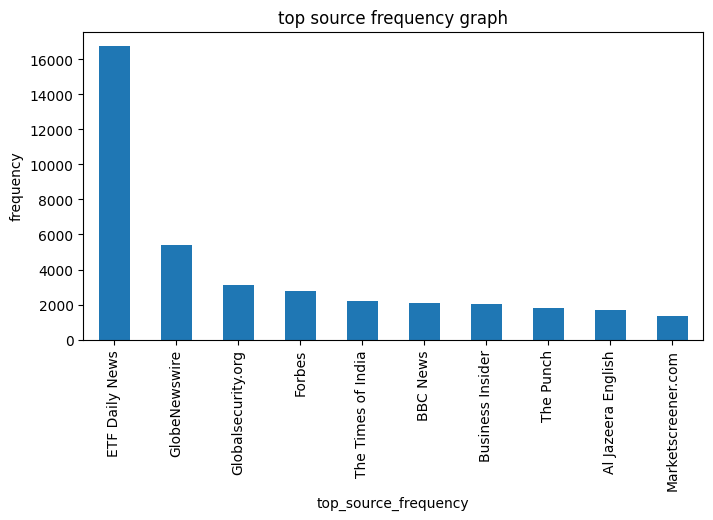

In [103]:
top_source_frequency=df_merge["source_name"].value_counts().head(10)
print(top_source_frequency)
plt.figure(figsize=(8,4))
top_source_frequency.plot(kind='bar' )

plt.title("top source frequency graph")
plt.xlabel("top_source_frequency")
plt.ylabel("frequency")

plt.show()

## Websites with the highest numbers of visitors traffic 

In [109]:
# Group by domain and select the best GlobalRank for each unique domain
grouped_df = df_merge.groupby('domain').agg({'GlobalRank': 'min'}).reset_index()

# Sort the grouped data by GlobalRank to get the top 10 websites
top_websites = grouped_df.sort_values(by='GlobalRank', ascending=True).head(10)

# Display the top 10 domains with the highest traffic
print(top_websites[['domain', 'GlobalRank']])


                 domain  GlobalRank
13           forbes.com          64
8               cnn.com          78
3             bbc.co.uk          87
4               bbc.com          92
6   businessinsider.com         115
26             time.com         137
20              npr.org         147
28            wired.com         148
25         theverge.com         202
14          gizmodo.com         403


## due to the fact that some domain have lost during the merging process we should use the original dataset with the domain colunmn added to it

In [110]:
# Check the original top-ranked domains before any merging
top_global_ranks = df_traffic.sort_values(by='GlobalRank', ascending=True).head(10)
print(top_global_ranks[['domain', 'GlobalRank']])


                 domain  GlobalRank
0            google.com           1
1          facebook.com           2
2           youtube.com           3
3           twitter.com           4
4         instagram.com           5
5          linkedin.com           6
6             apple.com           7
7         microsoft.com           8
8  googletagmanager.com           9
9         wikipedia.org          10


## Countries with the highest number of news media organisations (represented by domains in the data)

In [111]:
# Example: Standardizing the country column
df_merge_rating_location['Country'] = df_merge_rating_location['Country'].str.lower().str.strip()


In [113]:
# Group by country and count the number of unique domains
country_counts = df_merge_rating_location.groupby('Country')['domain'].nunique().reset_index()

# Rename columns for clarity
country_counts.columns = ['Country', 'NumDomains']


In [114]:
# Sort the countries by the number of domains in descending order
top_countries = country_counts.sort_values(by='NumDomains', ascending=False).head(10)

# Display the top countries
print(top_countries)


          Country  NumDomains
4   united states          20
1         nigeria           2
3  united kingdom           2
0           india           1
2          russia           1


In [117]:
# Group by location and count the number of unique domains
location_counts = df_domain_location.groupby('location')['domain'].nunique().reset_index()

# Rename columns for clarity
location_counts.columns = ['Location', 'NumDomains']

# Sort the locations by the number of domains in descending order
top_locations = location_counts.sort_values(by='NumDomains', ascending=False).head(10)

# Display the top locations
print(top_locations)


    Location  NumDomains
210       US       14111
208       UK        1946
98        IT        1804
70        FR        1039
172       RS        1020
34        CA         886
79        GM         884
40        CH         779
202       TU         725
94        IN         686


US: 14,111 domains

UK: 1,946 domains

IT (Italy): 1,804 domains

FR (France): 1,039 domains

RS (Russia/Serbia): 1,020 domains

CA (Canada): 886 domains

GM (Germany): 884 domains

CH (China/Switzerland): 779 domains

TU (Turkey/Tunisia): 725 domains

IN (India): 686 domains

C:\Users\user\AppData\Local\Temp\ipykernel_13900\320555506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Location', y='NumDomains', data=top_locations, palette='viridis')


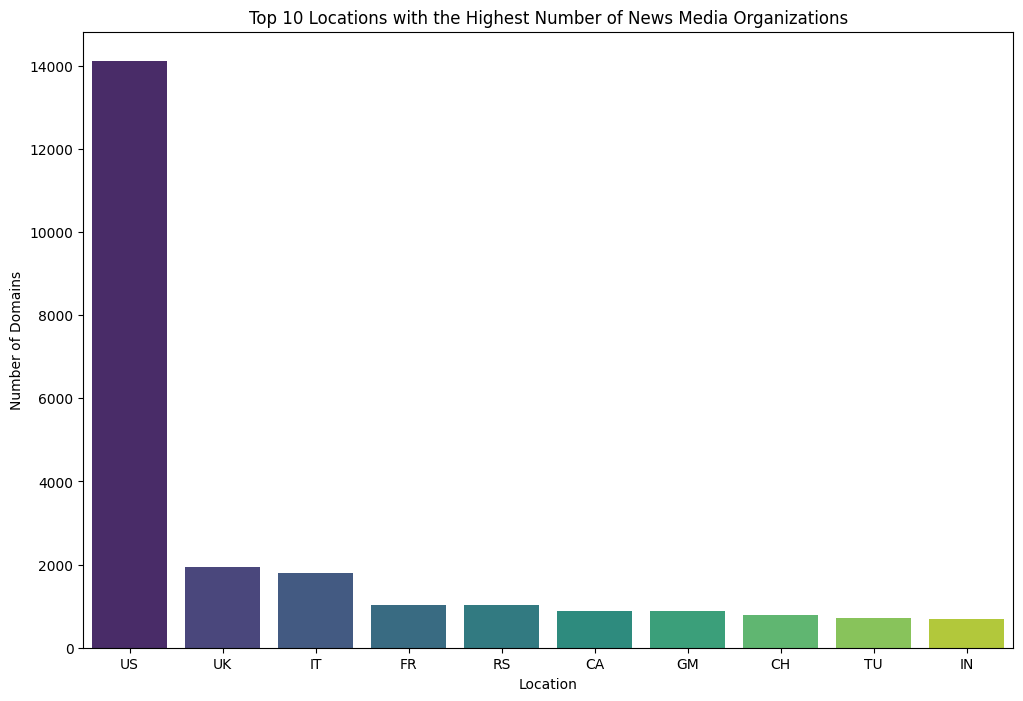

In [124]:
plt.figure(figsize=(12, 8))

# Create a barplot for the top locations
sns.barplot(x='Location', y='NumDomains', data=top_locations, palette='viridis')

# Set the labels and title
plt.xlabel('Location')
plt.ylabel('Number of Domains')
plt.title('Top 10 Locations with the Highest Number of News Media Organizations')
plt.show()

In [125]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 1.5 MB/s eta 0:00:09
     -- ------------------------------------- 0.8/12.8 MB 1.5 MB/s eta 0:00:09
     --- ------------------------------------ 1.0/12.8 MB 1.1 MB/s eta 0:00:11
     ---- ----------------------------------- 1.3/12.8 MB 1.1 MB/s eta 0:00:11
     ---- ----------------------------------- 1.3/12.8 MB 1.1 MB/s eta 0:00:11
     ---- ----------------------------------- 1.6/12.8 MB 1.1 MB/s eta 0:00:11
     ----- ---------------------------------- 1.8/12.8 MB 1.1 MB/s eta 0:00:10
     ------- -------------------------------- 2.4/12.8 MB 1.2 MB/s eta 0:00:09
     ------- -------------------------------- 2.4/12.8 MB 1.2 MB/s eta 0:00:09
     ------- -------------------------------- 2.4/12.8 MB 1.2 MB/s eta 0:

 ## Countries that have many articles written about them - the content of the news is about that country

## using name entity recognition for country

In [126]:
nlp=spacy.load('en_core_web_sm')

In [128]:
def extract_country(text):
    doc=nlp(text)
    countries=[ent.text for ent in doc.ents if ent.label_=='GPE']
    return countries[0] if countries else None

df_merge_rating_location['Country_mentioned']=df_merge_rating_location['content'].apply(extract_country)


In [134]:
df_merge_rating_location.columns

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment', 'domain', 'location',
       'Country', 'Country_mentioned'],
      dtype='object')

In [138]:

country_article_counts = df_merge_rating_location.groupby('Country_mentioned')['article_id'].count().reset_index()
country_article_counts

,Country_mentioned,article_id
0,(Kingdom of Germany,1
1,+10322,1
2,+2511,3
3,+3282,5
4,+4172,3
...,...,...
2788,their United States Champ,2
2789,turkey,3
2790,us,2
2791,west Africa,3


In [143]:
# Rename columns for clarity
country_article_counts.columns = ['Country', 'NumArticles']

# Sort by the number of articles in descending order
top_countries_articles = country_article_counts.sort_values(by='NumArticles', ascending=False).head(10)
least_countries_articles = country_article_counts.sort_values(by='NumArticles', ascending=False).tail(10)
# Display the top countries with the most articles written about them
print(top_countries_articles, least_countries_articles)

         Country  NumArticles
1055      Israel          781
640       Dublin          653
2400          US          558
1633    New York          528
812         Gaza          484
2413     Ukraine          421
2557  Wilmington          357
2380        U.S.          349
1959      Russia          321
1568    NEW YORK          300                           Country  NumArticles
1165                  Kickstarter            1
1164                       Kibera            1
1163                      Kibbutz            1
1162                   Kianothing            1
1161  Khyber Pakhtunkhwa Province            1
1160                      Kherson            1
1158                    Khankendi            1
1155                   Kepler-385            1
1154                       Kenyas            1
2792                        xMEMS            1


C:\Users\user\AppData\Local\Temp\ipykernel_13900\4288905036.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='NumArticles', y='Country', data=top_countries_articles, palette='viridis')
C:\Users\user\AppData\Local\Temp\ipykernel_13900\4288905036.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='NumArticles', y='Country', data=least_countries_articles, palette='viridis')


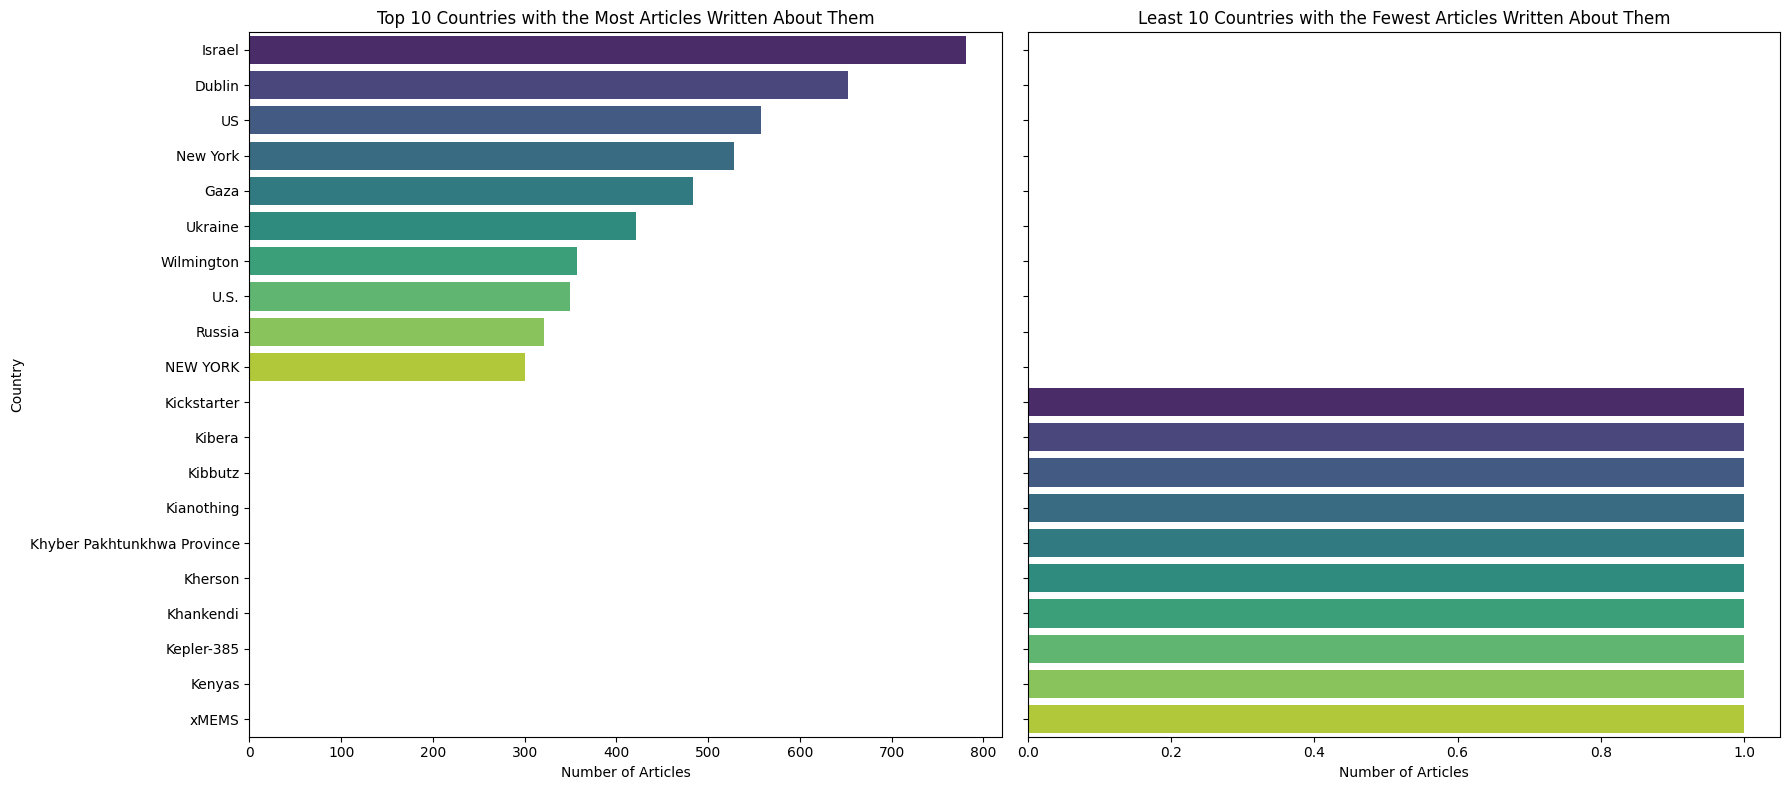

In [144]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=True)

# Top countries plot
sns.barplot(ax=axes[0], x='NumArticles', y='Country', data=top_countries_articles, palette='viridis')
axes[0].set_title('Top 10 Countries with the Most Articles Written About Them')
axes[0].set_xlabel('Number of Articles')
axes[0].set_ylabel('Country')

# Least countries plot
sns.barplot(ax=axes[1], x='NumArticles', y='Country', data=least_countries_articles, palette='viridis')
axes[1].set_title('Least 10 Countries with the Fewest Articles Written About Them')
axes[1].set_xlabel('Number of Articles')
axes[1].set_ylabel('')  # No need for y-label on the second plot to avoid repetition

# Show the plot
plt.tight_layout()
plt.show()

In [41]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58356 entries, 0 to 58355
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   article_id       58356 non-null  int64 
 1   source_id        17771 non-null  object
 2   source_name      58356 non-null  object
 3   author           56193 non-null  object
 4   title            58356 non-null  object
 5   description      58346 non-null  object
 6   url              58356 non-null  object
 7   url_to_image     54905 non-null  object
 8   published_at     58356 non-null  object
 9   content          58356 non-null  object
 10  category         58335 non-null  object
 11  article          58356 non-null  object
 12  title_sentiment  58356 non-null  object
 13  domain           58356 non-null  object
dtypes: int64(1), object(13)
memory usage: 6.2+ MB


## Websites that reported (the news content) about Africa, US, China, EU, Russia, Ukraine, Middle East? Note that you will need to group countries together to form the African, EU, and Middle East continents/regions.

In [146]:
# Example mapping of countries to regions (this list is not exhaustive)
country_to_region = {
    'united states': 'US',
    'china': 'China',
    'russia': 'Russia',
    'ukraine': 'Ukraine',
    'nigeria': 'Africa',
    'egypt': 'Africa',
    'germany': 'EU',
    'france': 'EU',
    'italy': 'EU',
    'saudi arabia': 'Middle East',
    'iran': 'Middle East',
    # Add more countries and their corresponding regions
}

In [148]:
# Define regions and their associated countries
africa_countries = ['nigeria', 'egypt', 'south africa', 'kenya', 'ethiopia']  # Add more African countries
eu_countries = ['germany', 'france', 'italy', 'spain', 'united kingdom']  # Add more EU countries
middle_east_countries = ['saudi arabia', 'iran', 'iraq', 'israel', 'turkey']  # Add more Middle Eastern countries

# Extend the country_to_region mapping to include these regions
country_to_region.update({
    country: 'Africa' for country in africa_countries
})
country_to_region.update({
    country: 'EU' for country in eu_countries
})
country_to_region.update({
    country: 'Middle East' for country in middle_east_countries
})
country_to_region.update({
    'united states': 'US',
    'china': 'China',
    'russia': 'Russia',
    'ukraine': 'Ukraine'
})

# Apply the mapping to the 'country_mentioned' column to create the 'region_mentioned' column
df_merge_rating_location['region_mentioned'] = df_merge_rating_location['Country_mentioned'].map(country_to_region)



In [149]:


# Drop rows where no region was mentioned
df_merge_rating_location = df_merge_rating_location.dropna(subset=['region_mentioned'])


In [150]:
# Group by website (domain) and region to count the number of articles
region_report_counts = df_merge_rating_location.groupby(['domain', 'region_mentioned'])['article_id'].count().reset_index()

# Rename columns for clarity
region_report_counts.columns = ['Website', 'Region', 'NumArticles']

# Display the result
print(region_report_counts)


             Website       Region  NumArticles
0            cnn.com  Middle East            1
1  digitaltrends.com  Middle East            1
2            npr.org  Middle East            1


In [151]:

# Example: Heatmap of the number of articles reported by websites across regions
pivot_table = region_report_counts.pivot('Website', 'Region', 'NumArticles')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')
plt.title('Number of Articles Reported by Websites Across Regions')
plt.show()


TypeError: DataFrame.pivot() takes 1 positional argument but 4 were given

## Websites with the highest count of positive, neutral, and negative sentiment? To do this you will need to group the data by website domain and apply descriptive statistics such as mean, median, and variance
compare the impact of using mean/average and median, 
check the distribution of sentiments for a particular domain (select the top 10 domains by visitors traffic) amount of news reported or vs the global news sentiment distribution)

In [154]:
# Group by domain and sentiment, and count the number of articles
sentiment_counts = df_merge_rating_location.groupby(['domain', 'title_sentiment'])['article_id'].count().reset_index()

# Pivot the data to get separate columns for positive, neutral, and negative sentiments
sentiment_counts_pivot = sentiment_counts.pivot(index='domain', columns='title_sentiment', values='article_id').fillna(0)

print(sentiment_counts_pivot.columns)
'''
# Rename columns for clarity
sentiment_counts_pivot.columns = ['Negative', 'Neutral', 'Positive']

# Calculate additional statistics
sentiment_counts_pivot['Total'] = sentiment_counts_pivot.sum(axis=1)
sentiment_counts_pivot['Mean'] = sentiment_counts_pivot[['Negative', 'Neutral', 'Positive']].mean(axis=1)
sentiment_counts_pivot['Median'] = sentiment_counts_pivot[['Negative', 'Neutral', 'Positive']].median(axis=1)
sentiment_counts_pivot['Variance'] = sentiment_counts_pivot[['Negative', 'Neutral', 'Positive']].var(axis=1)

# Sort by the total number of articles to get the top domains
top_sentiment_domains = sentiment_counts_pivot.sort_values(by='Total', ascending=False).head(10)

print(top_sentiment_domains)'''


Index(['Neutral'], dtype='object', name='title_sentiment')


"\n# Rename columns for clarity\nsentiment_counts_pivot.columns = ['Negative', 'Neutral', 'Positive']\n\n# Calculate additional statistics\nsentiment_counts_pivot['Total'] = sentiment_counts_pivot.sum(axis=1)\nsentiment_counts_pivot['Mean'] = sentiment_counts_pivot[['Negative', 'Neutral', 'Positive']].mean(axis=1)\nsentiment_counts_pivot['Median'] = sentiment_counts_pivot[['Negative', 'Neutral', 'Positive']].median(axis=1)\nsentiment_counts_pivot['Variance'] = sentiment_counts_pivot[['Negative', 'Neutral', 'Positive']].var(axis=1)\n\n# Sort by the total number of articles to get the top domains\ntop_sentiment_domains = sentiment_counts_pivot.sort_values(by='Total', ascending=False).head(10)\n\nprint(top_sentiment_domains)"

In [157]:
# Ensure all sentiment categories are present
for sentiment in ['Negative', 'Neutral', 'Positive']:
    if sentiment not in sentiment_counts_pivot.columns:
        sentiment_counts_pivot[sentiment] = 0

# Reorder columns to match the expected order
sentiment_counts_pivot = sentiment_counts_pivot[['Negative', 'Neutral', 'Positive']]

# Calculate additional statistics using .loc[] to avoid SettingWithCopyWarning
sentiment_counts_pivot.loc[:, 'Total'] = sentiment_counts_pivot.sum(axis=1)
sentiment_counts_pivot.loc[:, 'Mean'] = sentiment_counts_pivot[['Negative', 'Neutral', 'Positive']].mean(axis=1)
sentiment_counts_pivot.loc[:, 'Median'] = sentiment_counts_pivot[['Negative', 'Neutral', 'Positive']].median(axis=1)
sentiment_counts_pivot.loc[:, 'Variance'] = sentiment_counts_pivot[['Negative', 'Neutral', 'Positive']].var(axis=1)

# Sort by the total number of articles to get the top domains
top_sentiment_domains = sentiment_counts_pivot.sort_values(by='Total', ascending=False).head(10)

print(top_sentiment_domains)


title_sentiment    Negative  Neutral  Positive  Total      Mean  Median  \
domain                                                                    
cnn.com                   0        1         0      1  0.333333     0.0   
digitaltrends.com         0        1         0      1  0.333333     0.0   
npr.org                   0        1         0      1  0.333333     0.0   

title_sentiment    Variance  
domain                       
cnn.com            0.333333  
digitaltrends.com  0.333333  
npr.org            0.333333  


## 





Compare the content metadata across sites 
How similar are the raw message lengths across sites? Check the distribution among sites
How similar are the number of words in the title across sites? Check the distribution among sites

In [158]:
# Calculate the length of the content for each article
df_merge_rating_location['content_length'] = df_merge_rating_location['content'].apply(len)

# Group by domain and calculate summary statistics for content length
content_length_stats = df_merge_rating_location.groupby('domain')['content_length'].describe()

# Display the summary statistics for the content length across sites
print(content_length_stats)


                   count   mean  std    min    25%    50%    75%    max
domain                                                                 
cnn.com              1.0  214.0  NaN  214.0  214.0  214.0  214.0  214.0
digitaltrends.com    1.0  214.0  NaN  214.0  214.0  214.0  214.0  214.0
npr.org              1.0  156.0  NaN  156.0  156.0  156.0  156.0  156.0


C:\Users\user\AppData\Local\Temp\ipykernel_13900\1243598337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merge_rating_location['content_length'] = df_merge_rating_location['content'].apply(len)


Explanation
Single Data Points: Each domain has only one article, which leads to having no variation in the content_length. This is why the box plot shows a single line for each domain.

Standard Deviation as NaN: The standard deviation is not applicable when there's only one data point, which explains the NaN values in the statistical summary. Since there's no variability, the standard deviation cannot be computed.

C:\Users\user\AppData\Local\Temp\ipykernel_13900\1546530217.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='domain', y='content_length', data=top_domains_content, palette='viridis')


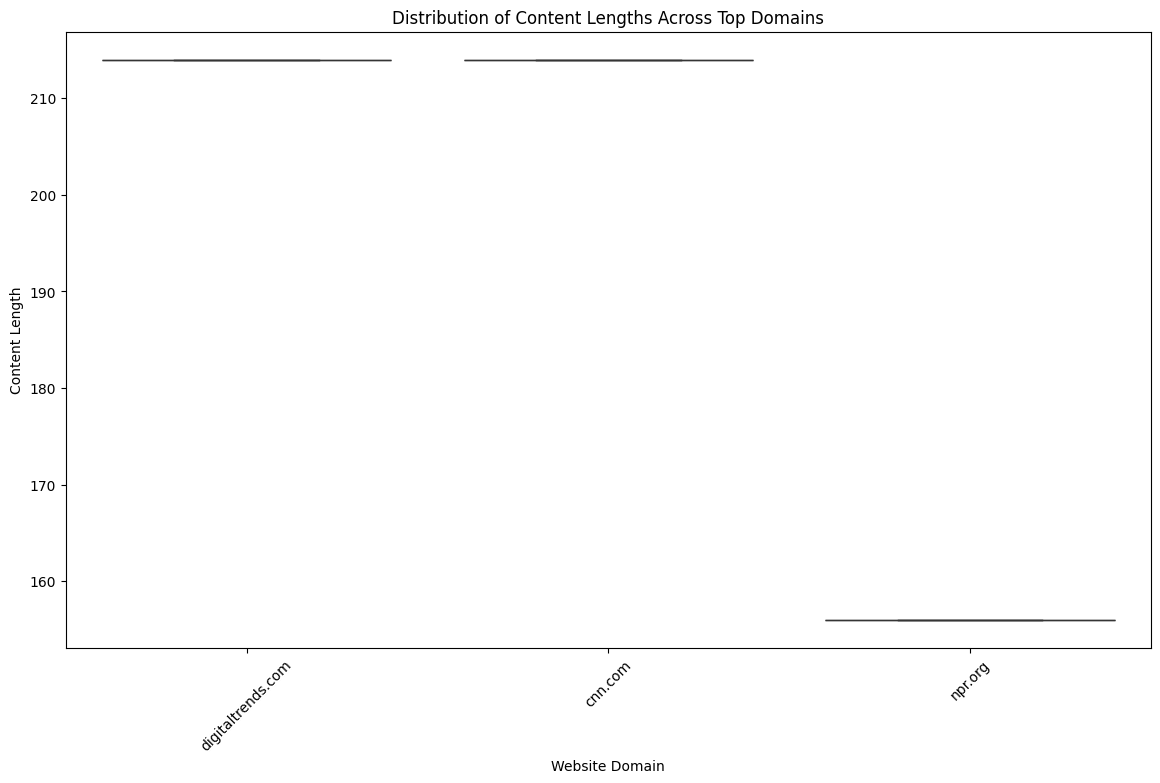

In [159]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for the top domains by article count
top_domains = df_merge_rating_location['domain'].value_counts().head(10).index
top_domains_content = df_merge_rating_location[df_merge_rating_location['domain'].isin(top_domains)]

# Plot the distribution of content lengths for the top domains
plt.figure(figsize=(14, 8))
sns.boxplot(x='domain', y='content_length', data=top_domains_content, palette='viridis')
plt.title('Distribution of Content Lengths Across Top Domains')
plt.xlabel('Website Domain')
plt.ylabel('Content Length')
plt.xticks(rotation=45)
plt.show()


In [42]:
df_domain_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37802 entries, 0 to 37801
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   SourceCommonName  37802 non-null  object
 1   location          37802 non-null  object
 2   Country           37801 non-null  object
dtypes: object(3)
memory usage: 886.1+ KB
